# Temporal Series Tutorial

### Diego Tuccillo

### Part 1 : Load Time Series Data

In [1]:
!ls

ComplexNetworkAnalysis.key     birth_1959.csv
Temporal Series Tutorial.ipynb temperatures.csv
TemporalSeries.key


In [11]:
#import libraries]
import matplotlib.pyplot as plt
import numpy as np
from pandas import Series
from pandas import DataFrame
from pandas import TimeGrouper
from pandas import concat
from matplotlib import pyplot


In [3]:
#df = pd.read_csv('birth_1959.csv')
series = Series.from_csv('birth_1959.csv', header=0)

/Users/diegotuccillo/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:4141: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


- Print the first few rows using the head() function.
- Print the dimensions of the dataset using the size attribute.
- Query the dataset using a date-time string, how many born in january?
- Print summary statistics of the observations
- Plot of the time series

In [4]:
series.head()

Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
Name: Births, dtype: int64

In [83]:
print(series['1959-01'])


Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
1959-01-06    29
1959-01-07    45
1959-01-08    43
1959-01-09    38
1959-01-10    27
1959-01-11    38
1959-01-12    33
1959-01-13    55
1959-01-14    47
1959-01-15    45
1959-01-16    37
1959-01-17    50
1959-01-18    43
1959-01-19    41
1959-01-20    52
1959-01-21    34
1959-01-22    53
1959-01-23    39
1959-01-24    32
1959-01-25    37
1959-01-26    43
1959-01-27    39
1959-01-28    35
1959-01-29    44
1959-01-30    38
1959-01-31    24
Name: Births, dtype: int64


In [5]:
print(series.describe())

count    365.000000
mean      41.980822
std        7.348257
min       23.000000
25%       37.000000
50%       42.000000
75%       46.000000
max       73.000000
Name: Births, dtype: float64


---
**NB that you used a new function of Pandas made specifically for Data Series. For more functionalities:**

* https://chrisalbon.com/python/data_wrangling/pandas_time_series_basics/

* http://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html

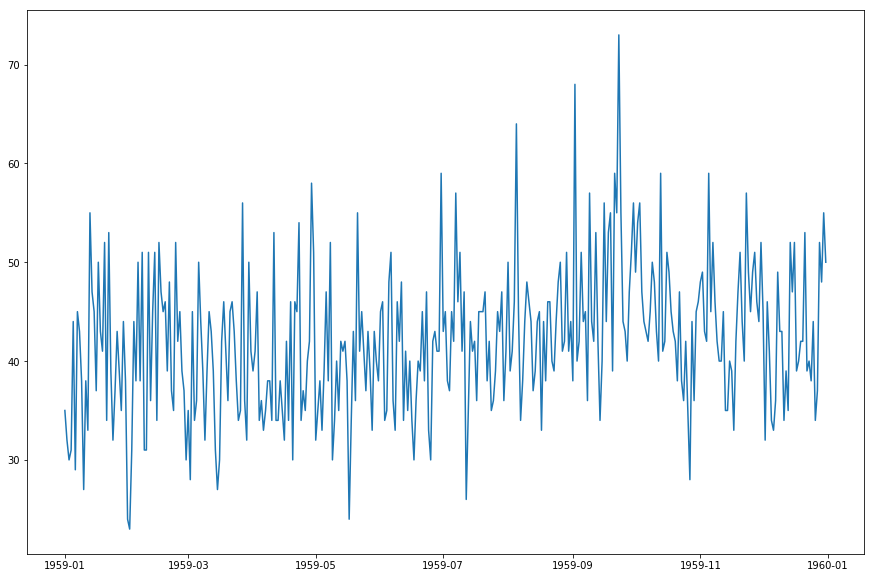

In [6]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.figure(figsize=(15,10))
plt.plot(series)
plt.show()

---

*** Now explore the dataset ***


---

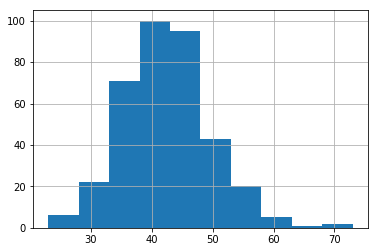

In [8]:
# Histograms....
series.hist()
plt.show()

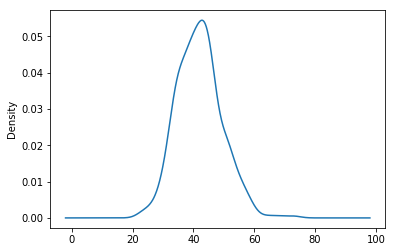

In [9]:
#and Density Plots.
# In statistics, kernel density estimation (KDE) is a non-parametric way to estimate the probability density function (PDF) of a random variable.
series.plot(kind='kde')
plt.show()

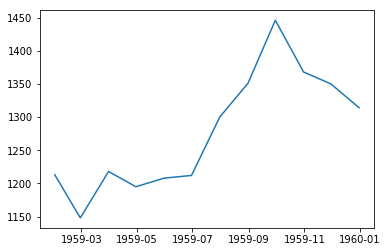

In [16]:
#Resample
series = Series.from_csv('birth_1959.csv', header=0)
#groups = one_year.groupby(TimeGrouper('M'))
groups = series.resample('M').sum()
#groups = series.resample('Y').sum()
plt.plot(groups)





---
*** Lags ***

Time series modeling assumes a relationship between an observation and the previous observation.

Previous observations in a time series are called lags, with the observation at the previous time step called lag1, the observation at two time steps ago lag2, and so on.

A useful type of plot to explore the relationship between each observation and a lag of that observation is the scatter plot.

Pandas has a built-in function for exactly this called the lag plot. It plots the observation at time t on the x-axis and the lag1 observation (t-1) on the y-axis.

It is a measure of the possible correlation of the data, and it is good they can be modeled.


---

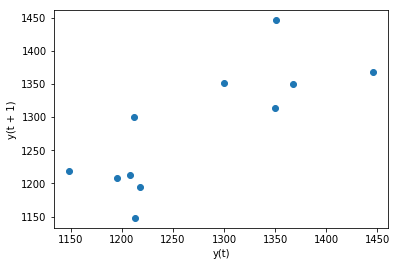

In [18]:
from pandas.plotting import lag_plot
lag_plot(groups)
plt.show()

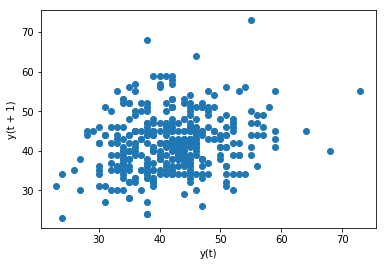

In [19]:
from pandas.plotting import lag_plot
lag_plot(series)
plt.show()

---

*** 6. Time Series Autocorrelation Plots ***

We can quantify the strength and type of relationship between observations and their lags.

In statistics, this is called correlation, and when calculated against lag values in time series, it is called autocorrelation (self-correlation).

A correlation value calculated between two groups of numbers, such as observations and their lag1 values, results in a number between -1 and 1. The sign of this number indicates a negative or positive correlation respectively. A value close to zero suggests a weak correlation, whereas a value closer to -1 or 1 indicates a strong correlation.

Correlation values, called correlation coefficients, can be calculated for each observation and different lag values. Once calculated, a plot can be created to help better understand how this relationship changes over the lag.

This type of plot is called an autocorrelation plot and Pandas provides this capability built in, called the autocorrelation_plot() function.

The example below creates an autocorrelation plot for the Minimum Daily Temperatures dataset:
    
---


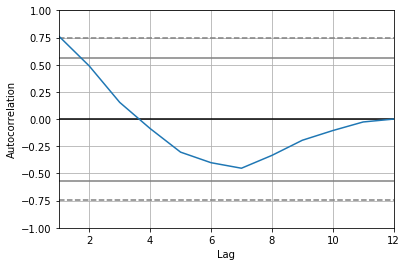

In [22]:
from pandas.plotting import autocorrelation_plot
#autocorrelation_plot(series)
autocorrelation_plot(groups)
plt.show()

## Forecasting Analysis

### Autoregressive AR

Autoregression is a time series model that uses observations from previous time steps as input to a regression equation to predict the value at the next time step.

It is a very simple idea that can result in accurate forecasts on a range of time series problems.

*** y = b0 + b1*X1 ***

Where y is the prediction, b0 and b1 are coefficients found by optimizing the model on training data, and X is an input value.

This technique can be used on time series where input variables are taken as observations at previous time steps, called lag variables.

For example, we can predict the value for the next time step (t+1) given the observations at the last two time steps (t-1 and t-2). 
As a regression model, this would look as follows:

*** X(t) = b0 + b1*X(t-1) + b2*X(t-2) ***





Lag: 16
Coefficients: [ 1.73118908e+01  1.55227991e-01  7.57354544e-02  5.14892409e-02
  1.83019314e-02  6.30283715e-02  2.57549513e-03  1.58567997e-01
  4.60325743e-02 -3.75935366e-02 -1.04615261e-02  3.66391301e-02
 -7.88381410e-02 -1.12589294e-02  2.79571383e-02  6.12391893e-02
  2.95111491e-02]
predicted = 41.224461, expected = 44.000000
predicted = 40.971893, expected = 34.000000
predicted = 40.743373, expected = 37.000000
predicted = 42.067430, expected = 52.000000
predicted = 42.232141, expected = 48.000000
predicted = 42.116348, expected = 55.000000
predicted = 41.933617, expected = 50.000000
MSE on Test set =  61.900417477531434


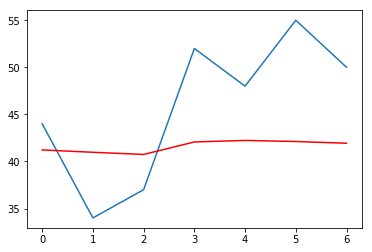

In [23]:
# Make predictions Autoregressive
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
# split dataset
X = series.values
train, test = X[1:len(X)-7], X[len(X)-7:]
# train autoregression
model = AR(train)
model_fit = model.fit()

#We print the optimal lag and the list of coefficients in the trained linear regression model.
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)

# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted = %f, expected = %f' %(predictions[i], test[i]))
error = mean_squared_error(test, predictions)
print('============================')
print('MSE on Test set = ', error)
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [24]:
test.shape

(7,)

## ARIMA Forecasting

ARIMA is an acronym that stands for **AutoRegressive Integrated Moving Average**.
It is a generalization of the simpler AutoRegressive Moving Average and adds the notion of integration.

Briefly, the key aspects of the model are:

AR: Autoregression. A model that uses the dependent relationship between an observation and some number of lagged observations.
I: Integrated. The use of differencing of raw observations (e.g. subtracting an observation from an observation at the previous time step) in order to make the time series stationary.
MA: Moving Average. A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.

Each of these components are **explicitly specified in the model as a parameter**. A standard notation is used of ARIMA(p,d,q).

The parameters of the ARIMA model are defined as follows:

p: The number of lag observations included in the model, also called the lag order.
d: The number of times that the raw observations are differenced, also called the degree of differencing.
q: The size of the moving average window, also called the order of moving average.


A value of 0 can be used for a parameter, which indicates to not use that element of the model.


predicted=41.725497, expected=44.000000
predicted=43.153263, expected=34.000000
predicted=38.595744, expected=37.000000
predicted=38.220975, expected=52.000000
predicted=42.333122, expected=48.000000
predicted=44.174518, expected=55.000000
predicted=46.559284, expected=50.000000
Test MSE: 63.215


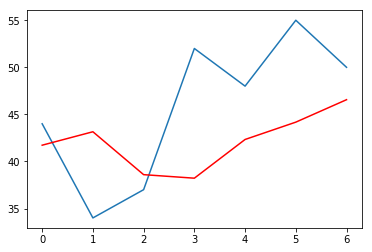

In [33]:
# Make predictions: ARIMA
from statsmodels.tsa.arima_model import ARIMA
from pandas import read_csv

history = [x for x in train]
predictions = list()
for t in range(len(test)):
    # we set lag value to 5 for autoregression, uses a difference order of 1 to make the time series stationary, and uses a moving average model of 0.
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()


